In [1]:
source("summarize_functions.r")
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library(dplyr)
library(purrr)

library(ggplot2)
 library("RColorBrewer")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c('T cell','B cell','NK cell',  'Monocytes', 'Erythroid','Myelocytes','Dendritic cell',   'HSCs & MPPs',  'Lymphomyeloid prog',  'Megakaryocyte progenitors',
              'Erythro-myeloid progenitors','Plasma cells','Eosinophil-basophil-mast cell progenitors',
              'Mesenchymal cell')
methods <- c("Seurat", "SingleR","CellID", "SingleCellNet", "ItClust")  

sizes <- c(14707,9848,5438, 4081,4019,3060,2681,1908,1454,666,492,486,199,18)
names(sizes) <- celltypes

nb.cols <- 14
colors <- colorRampPalette(brewer.pal(8, "Set3"))(nb.cols)
names(colors) <- celltypes


In [3]:
bootstrap <- read.csv("../Results/Files/summary_bonemarrow_bootstrapmax.csv")
meta <- read.csv("../Data/Fulldata/BoneMarrow_Reference//meta.csv")

data_lineplot <- get_data_lineplot(bootstrap, groupby = c("size", "method", "reference", "class", "full_precision", "full_recall",
                                                            "full_f1", "full_accuracy"))
refSizes <- data.frame(table(meta$class_))
colnames(refSizes) <- c("class", "refSize")


data_lineplot <- merge(data_lineplot, refSizes, by="class")
data_lineplot$class <- factor(data_lineplot$class, levels=celltypes)
data_lineplot$method <- factor(data_lineplot$method, levels=methods)

   class method  reference set precision    recall        f1  accuracy
1 B cell CellID BoneMarrow   7 0.9893147 0.6837280 0.8086132 0.6837280
2 B cell CellID BoneMarrow   8 0.9889562 0.7069009 0.8244728 0.7069009
3 B cell CellID BoneMarrow   9 0.9907763 0.6564808 0.7897075 0.6564808
4 B cell CellID BoneMarrow  10 0.9870643 0.6995162 0.8187779 0.6995162
5 B cell CellID BoneMarrow   2 0.9901458 0.6396741 0.7772277 0.6396741
6 B cell CellID BoneMarrow   3 0.9900589 0.6847466 0.8095740 0.6847466
  full_precision full_recall   full_f1 full_accuracy  size
1      0.9734287   0.7276547 0.8327869     0.7276547 14707
2      0.9734287   0.7276547 0.8327869     0.7276547 14707
3      0.9734287   0.7276547 0.8327869     0.7276547 14707
4      0.9734287   0.7276547 0.8327869     0.7276547 14707
5      0.9734287   0.7276547 0.8327869     0.7276547 14707
6      0.9734287   0.7276547 0.8327869     0.7276547 14707


`summarise()` has grouped output by 'size', 'method', 'reference', 'class', 'full_precision', 'full_recall', 'full_f1'. You can override using the `.groups` argument.


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


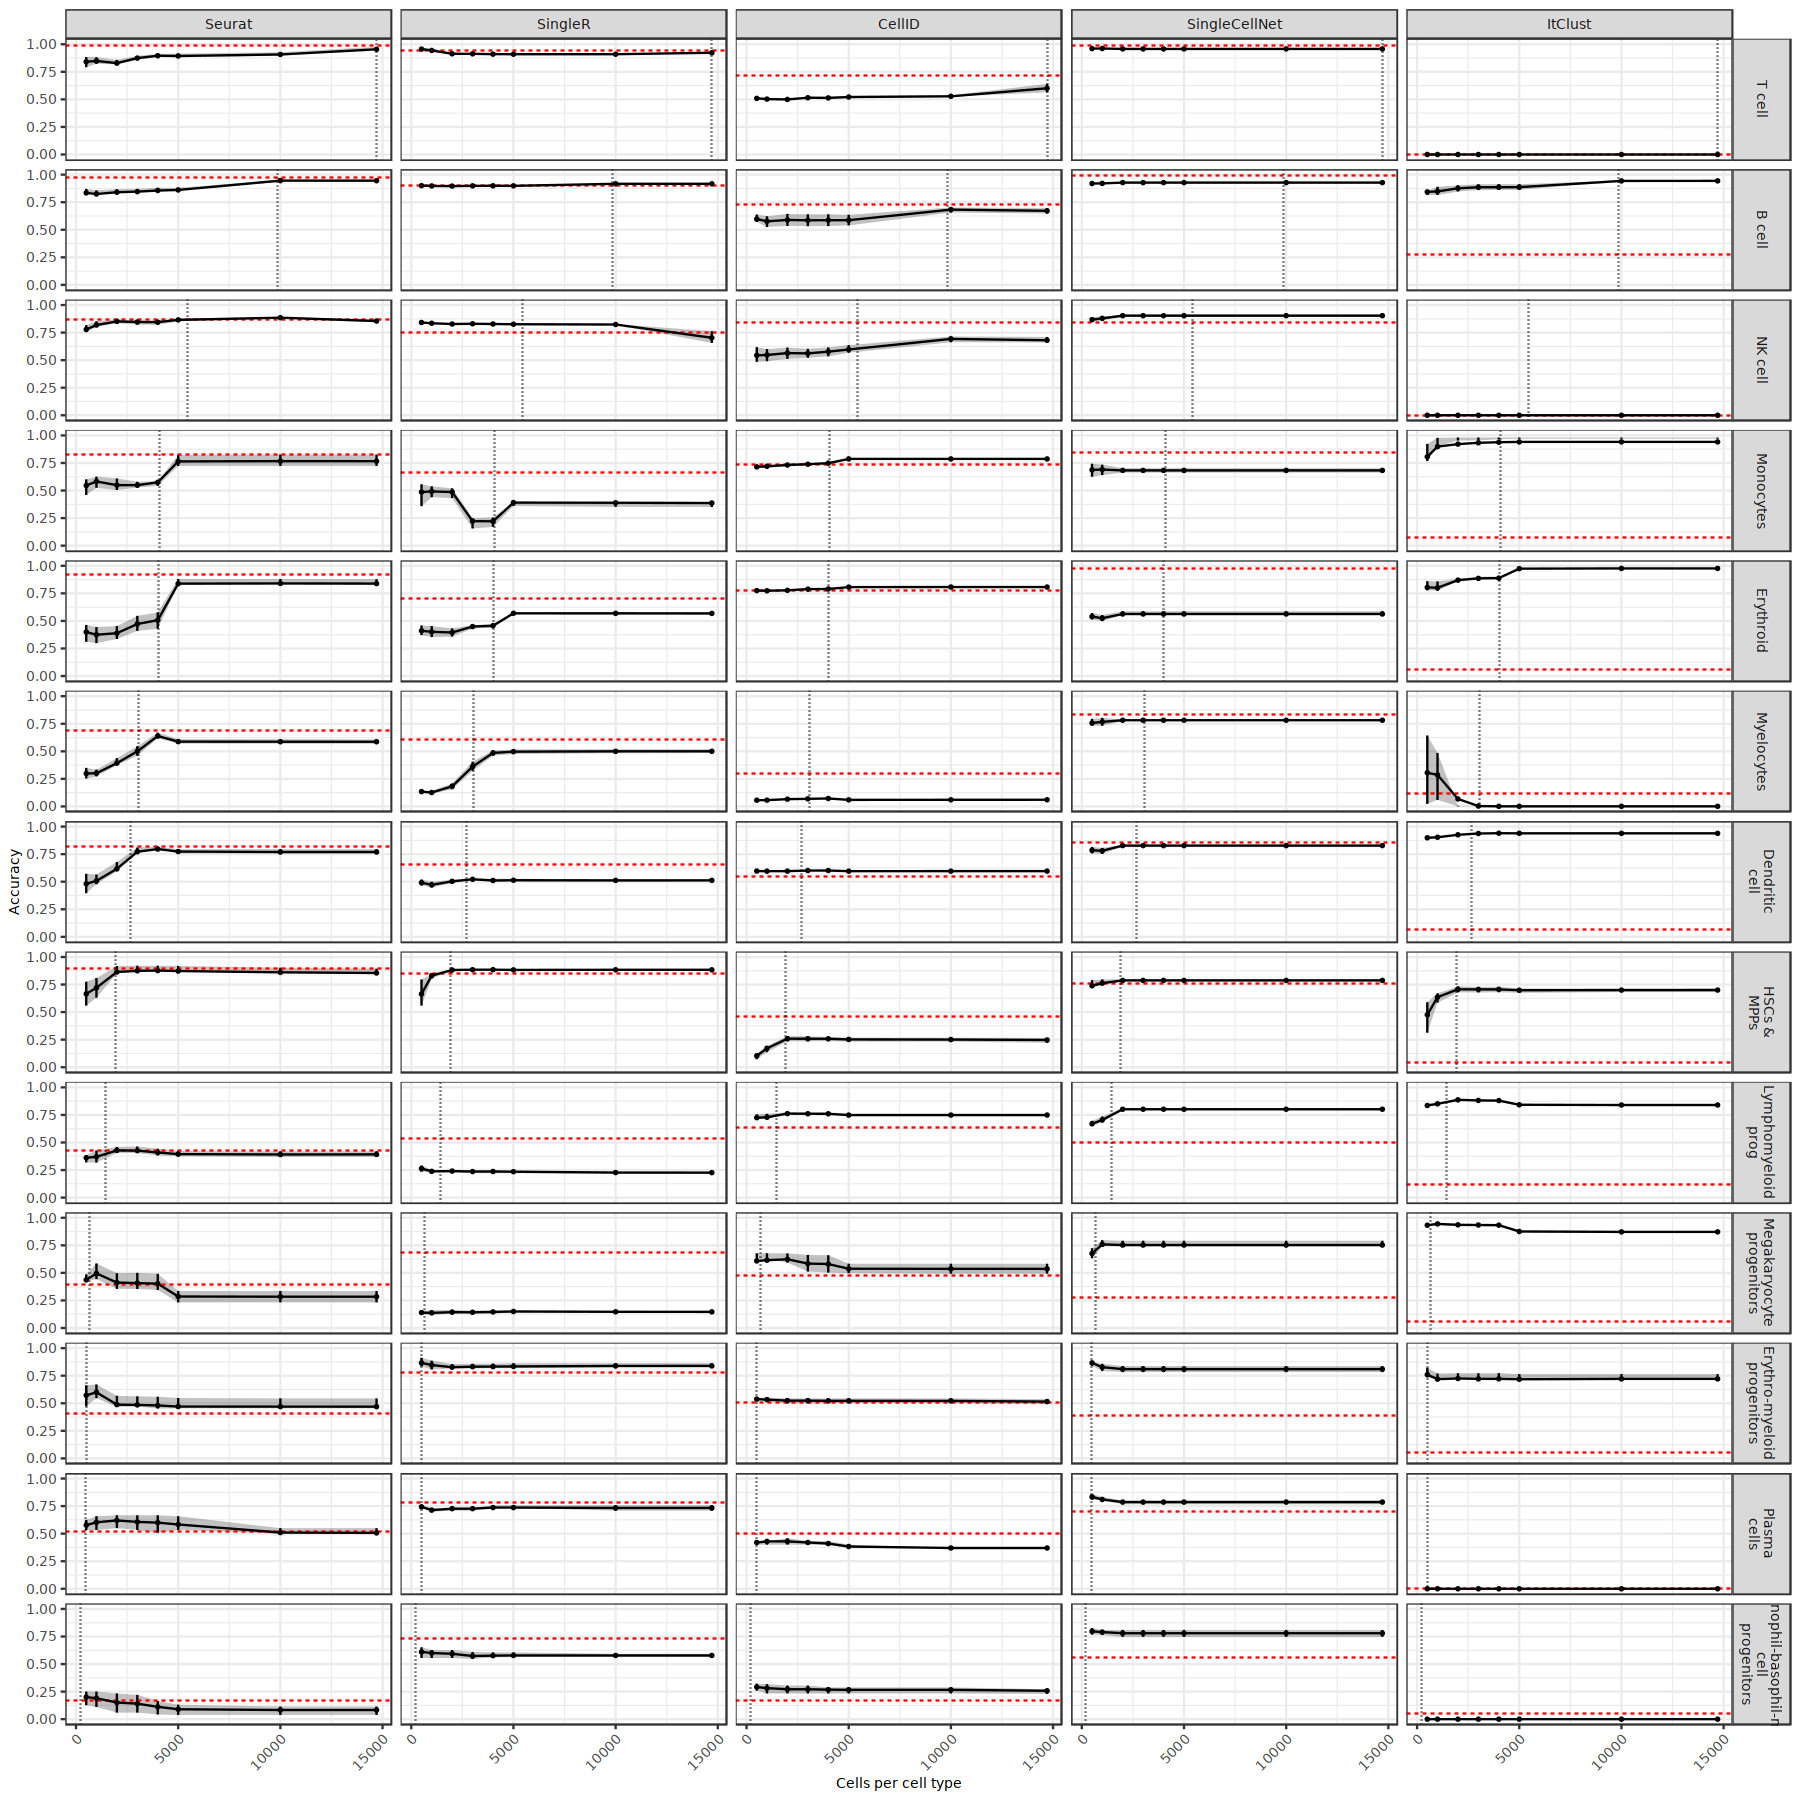

In [4]:
options(repr.plot.width=15, repr.plot.height=15)
s1 =  get_lineplot(data_lineplot, "Accuracy",log = TRUE, breaks = c(1000,3000,5000,10000))
s1

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 24 rows containing missing values (`geom_hline()`).”


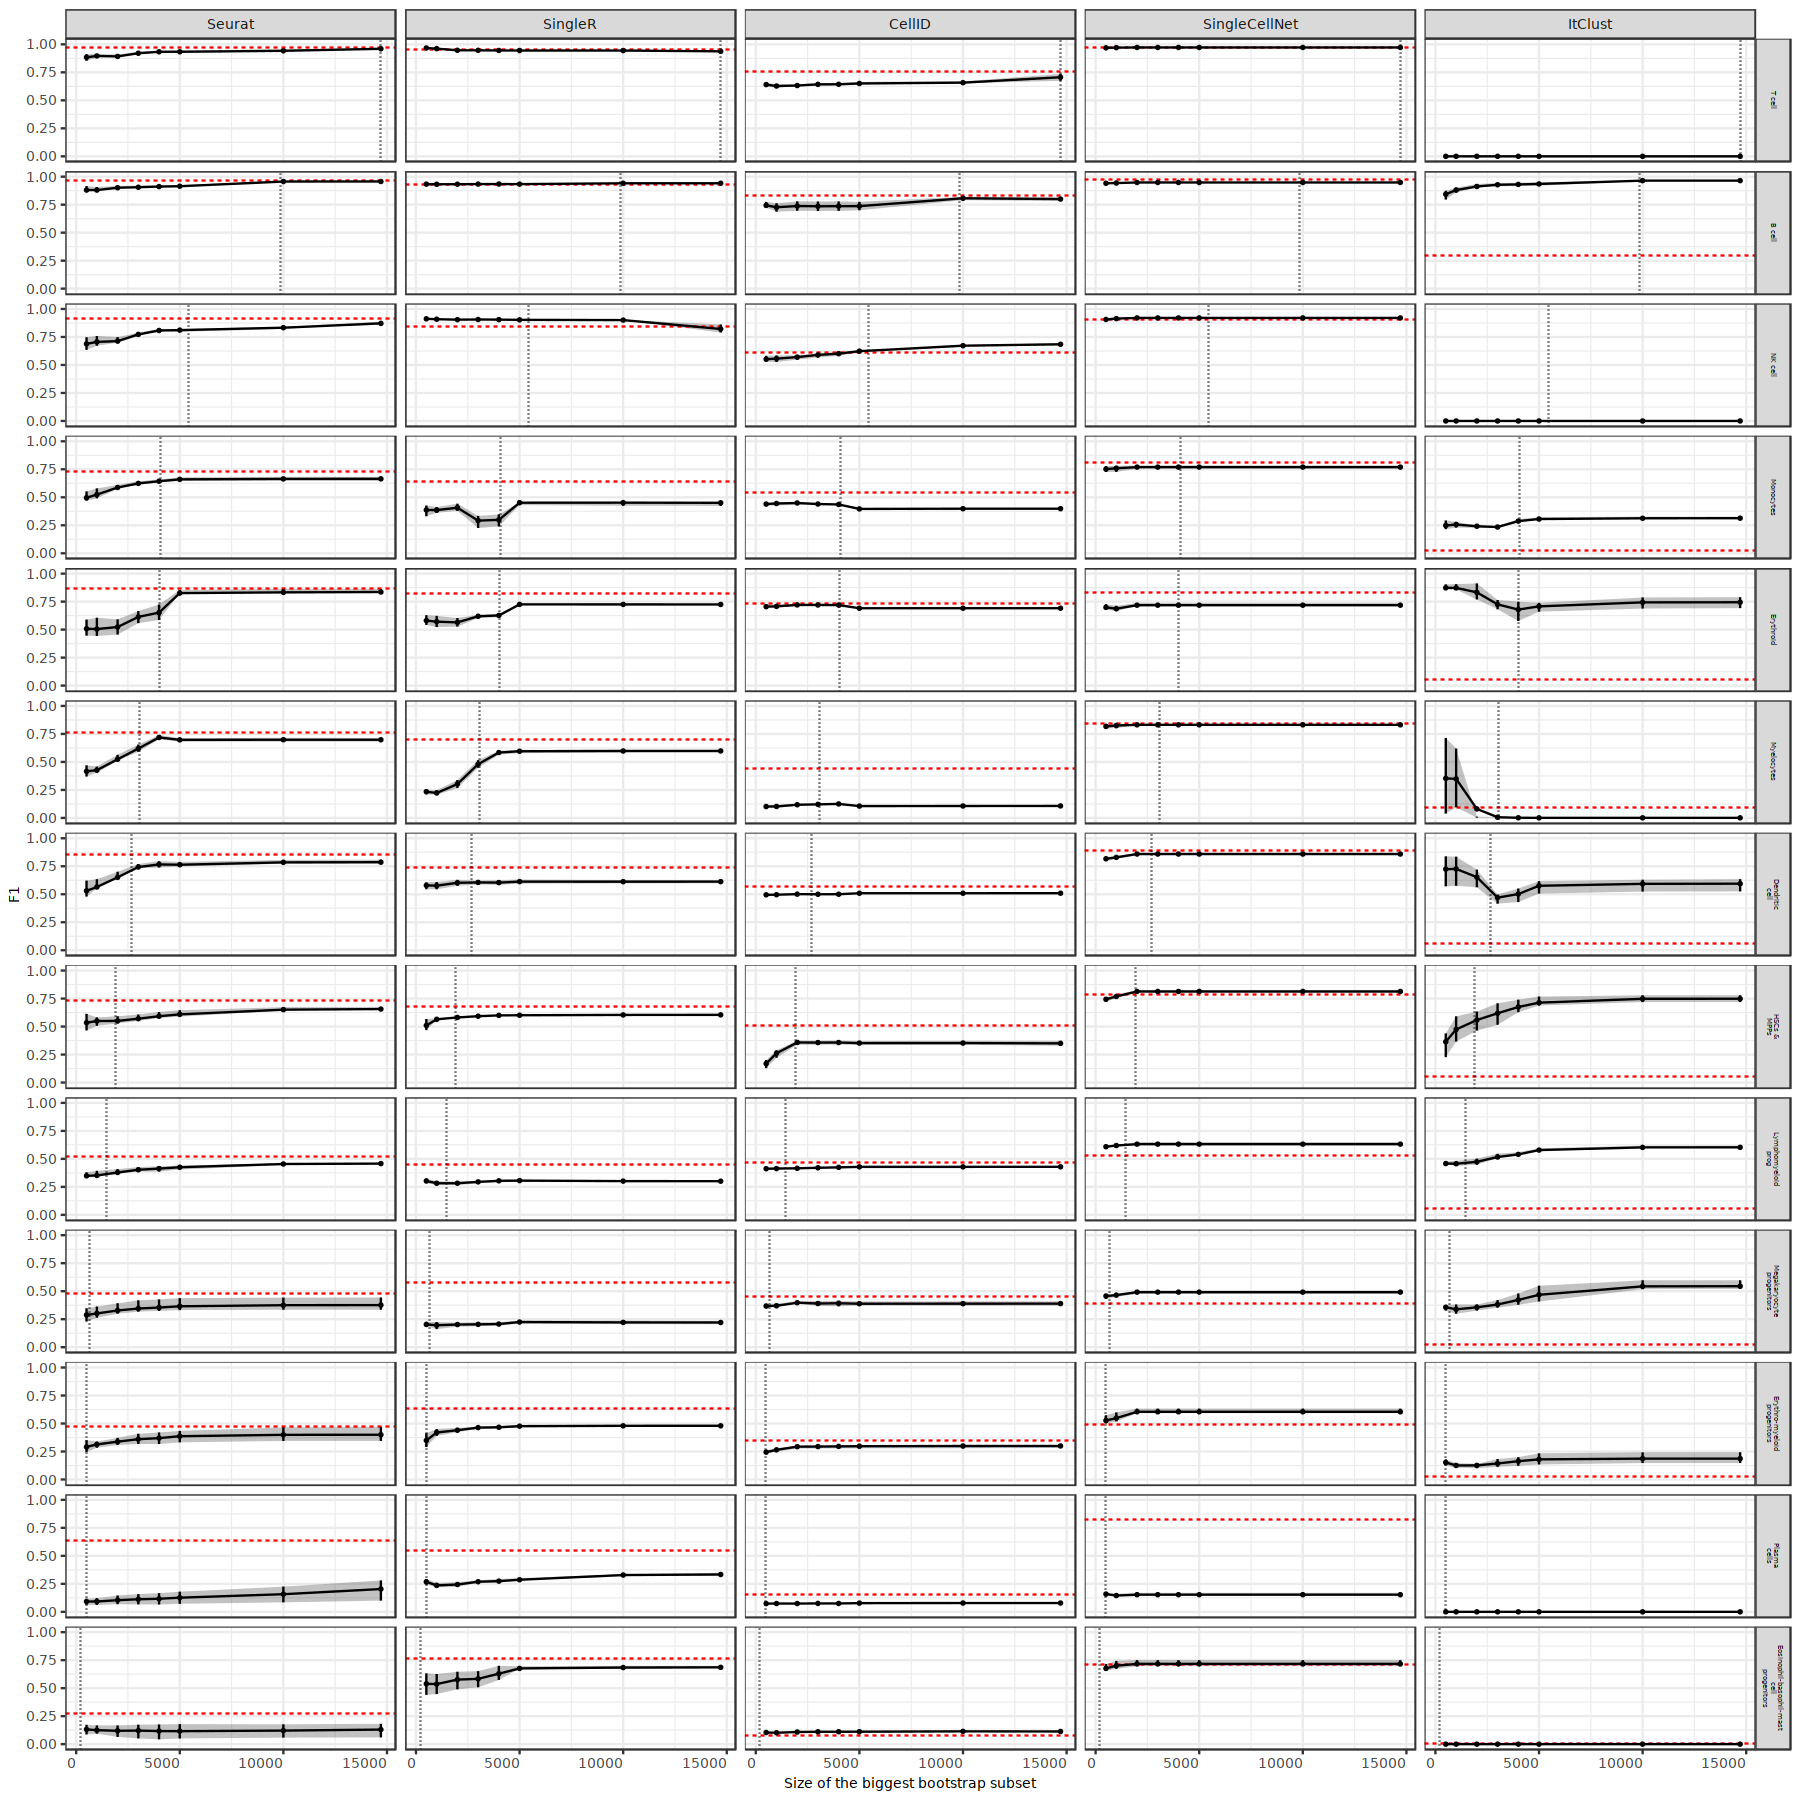

In [40]:
s3 =  get_lineplot(data_lineplot, "F1")+theme(strip.text.y = element_text(size = 4),
                                             axis.text.x=element_text(angle=0, hjust = 1))+
xlab("Size of the biggest bootstrap subset")

s3

In [6]:
umapdata <- read.csv("../Results/Files/umap_bonemarrow_data.csv") # umap data file
rownames(umapdata)<- umapdata$id
expressiondata_file="../Data/Fulldata/BoneMarrow_Query//data.csv" #  expression data
measures <- read.csv("../Results/Files//values_full_bonemarrow.csv") # results on the full data
meta <- read.csv("../Data/Fulldata/BoneMarrow_Query/meta.csv")


In [7]:
umapdata <- merge(umapdata, meta, by="id")
rownames(umapdata) <- umapdata$id
head(umapdata)
umap <- prepare_umap(file = expressiondata_file, meta_data = umapdata)


,id,reference,CellID,ItClust,Seurat,SingleCellNet,SingleR,ct,class_
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X100105,X100105,BoneMarrow,1.0,1,0.95,1,0.80,Plasmacytoid dendritic cell progenitors,Dendritic cell
X100197,X100197,BoneMarrow,1.0,1,1.00,1,1.00,Mature naive B cells,B cell
X100262,X100262,BoneMarrow,1.0,0,1.00,1,1.00,CD8+CD103+ tissue resident memory T cells,T cell
X100267,X100267,BoneMarrow,1.0,1,1.00,1,1.00,Nonswitched memory B cells,B cell
X100405,X100405,BoneMarrow,0.5,0,1.00,1,0.55,CD8+ naive T cells,T cell
X100444,X100444,BoneMarrow,1.0,1,1.00,1,0.95,Lymphomyeloid prog,Lymphomyeloid prog


Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 13165 column names but the data has 13166 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 500
[1] "Scaling..."
[1] "create seurat object...."
[1] "Set assay...."
[1] "PCA...."
[1] "Get UMAP..."


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


[1] "...."


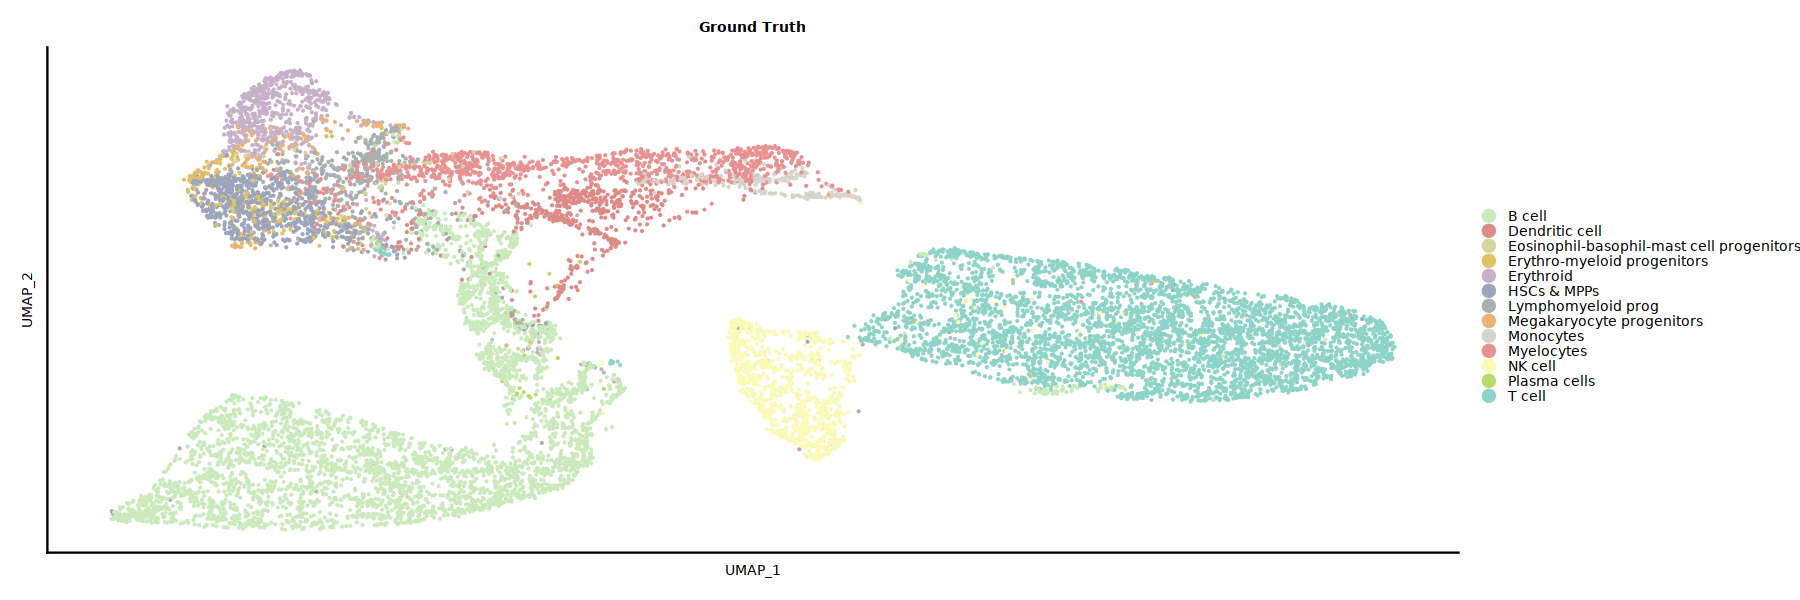

In [29]:
options(repr.plot.width=15, repr.plot.height=5)
plot_celltypes = plot_umap(umap, c("class_"),NULL, colors,1,1, legend_ncol = 1,
                           title="Ground Truth")
f6a <- plot_celltypes[[1]]
f6a



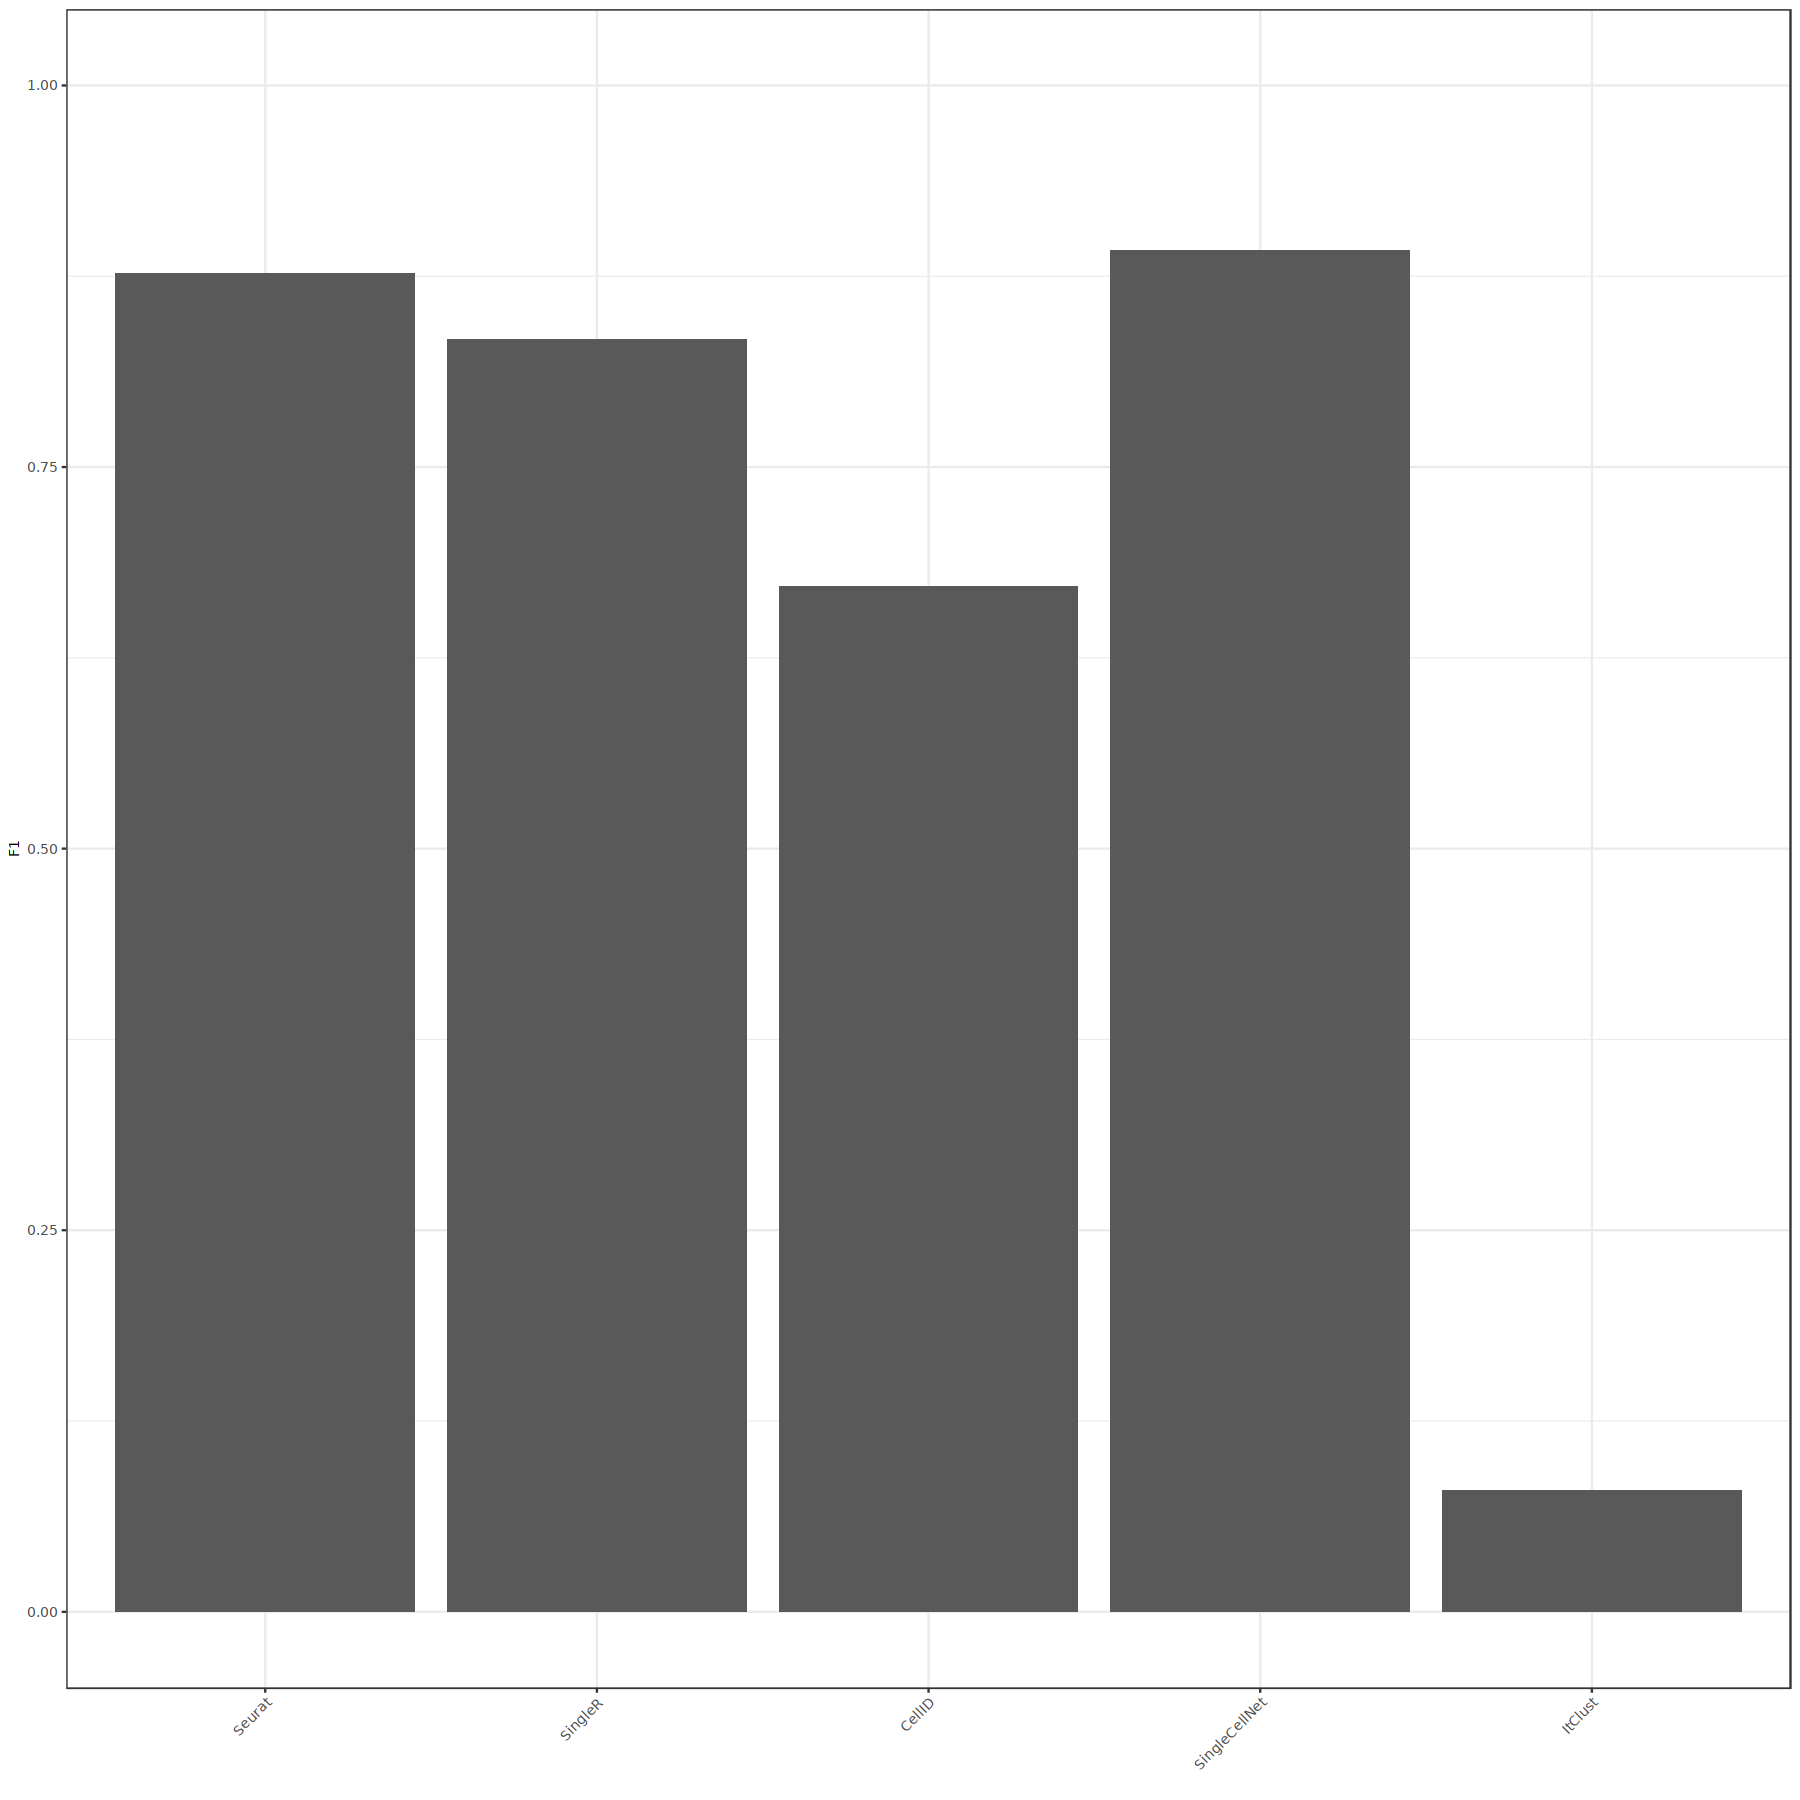

In [13]:

measures$obs <- sizes[ match(measures$class, celltypes ) ]

f1 <-  measures %>% dplyr::group_by( method) %>% 
           dplyr::summarize(f1 = sum(f1 * obs) / sum(obs) , precision = sum(precision*obs)/ sum(obs), accuracy = sum(accuracy*obs)/ sum(obs))



f1$method <- factor(f1$method, levels=methods)

f7b <- ggplot(f1, aes(method, f1)) + geom_bar(stat="identity")                                                                     
f7b <- addFormatting(f7b, "F1", "", legend="none", xtext="angle")

f7b

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


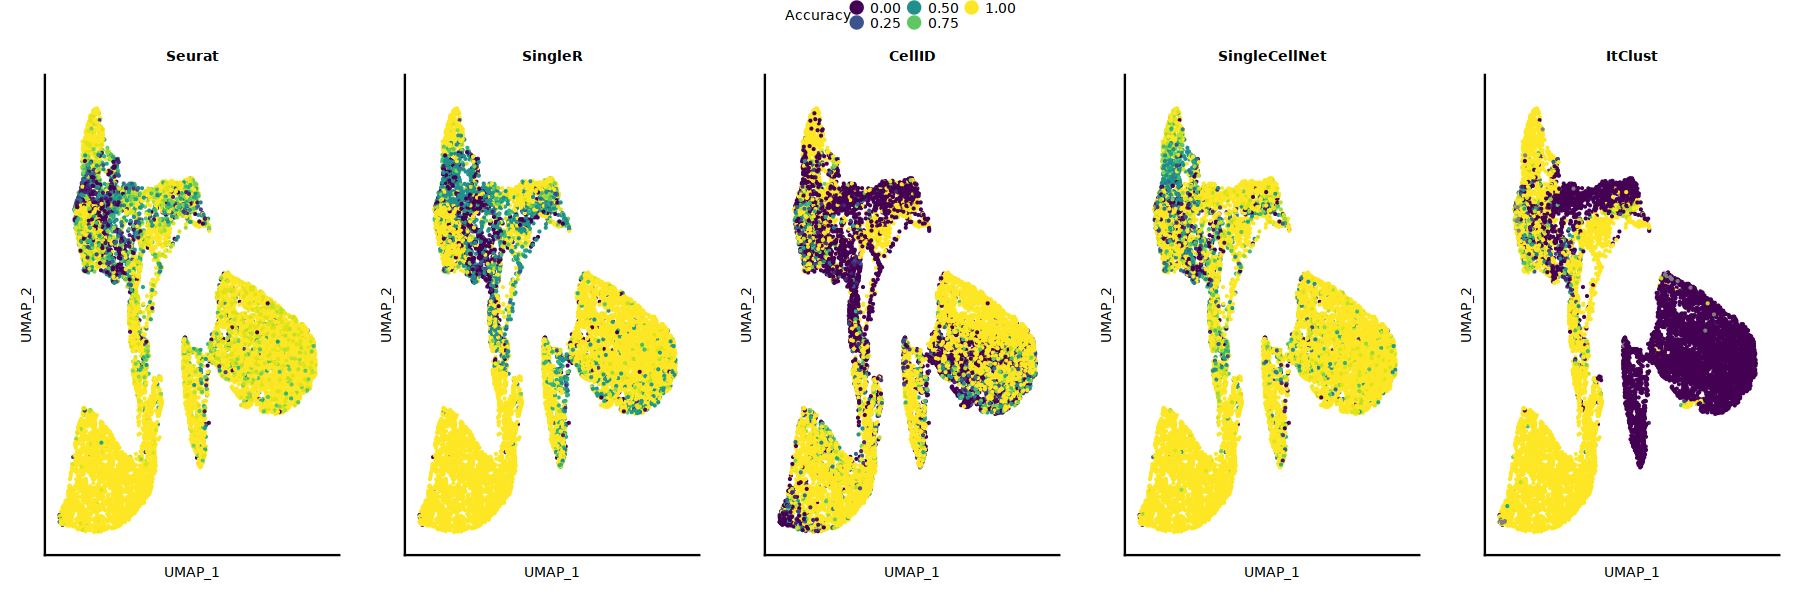

In [9]:
plots <- plot_features(umap,methods, NULL, 1,1, legend_ncol = 3) 
names(plots) <- methods
plots <- lapply(seq(1,length(methods),1) , function(n) plots[[n]]+ labs(title= methods[n]))                
f6b <- ggpubr::ggarrange(plotlist = plots, font.label = list(size = 10), 
                         common.legend = T, legend = "top", ncol=5, nrow=1)
f6b


[1] 1300

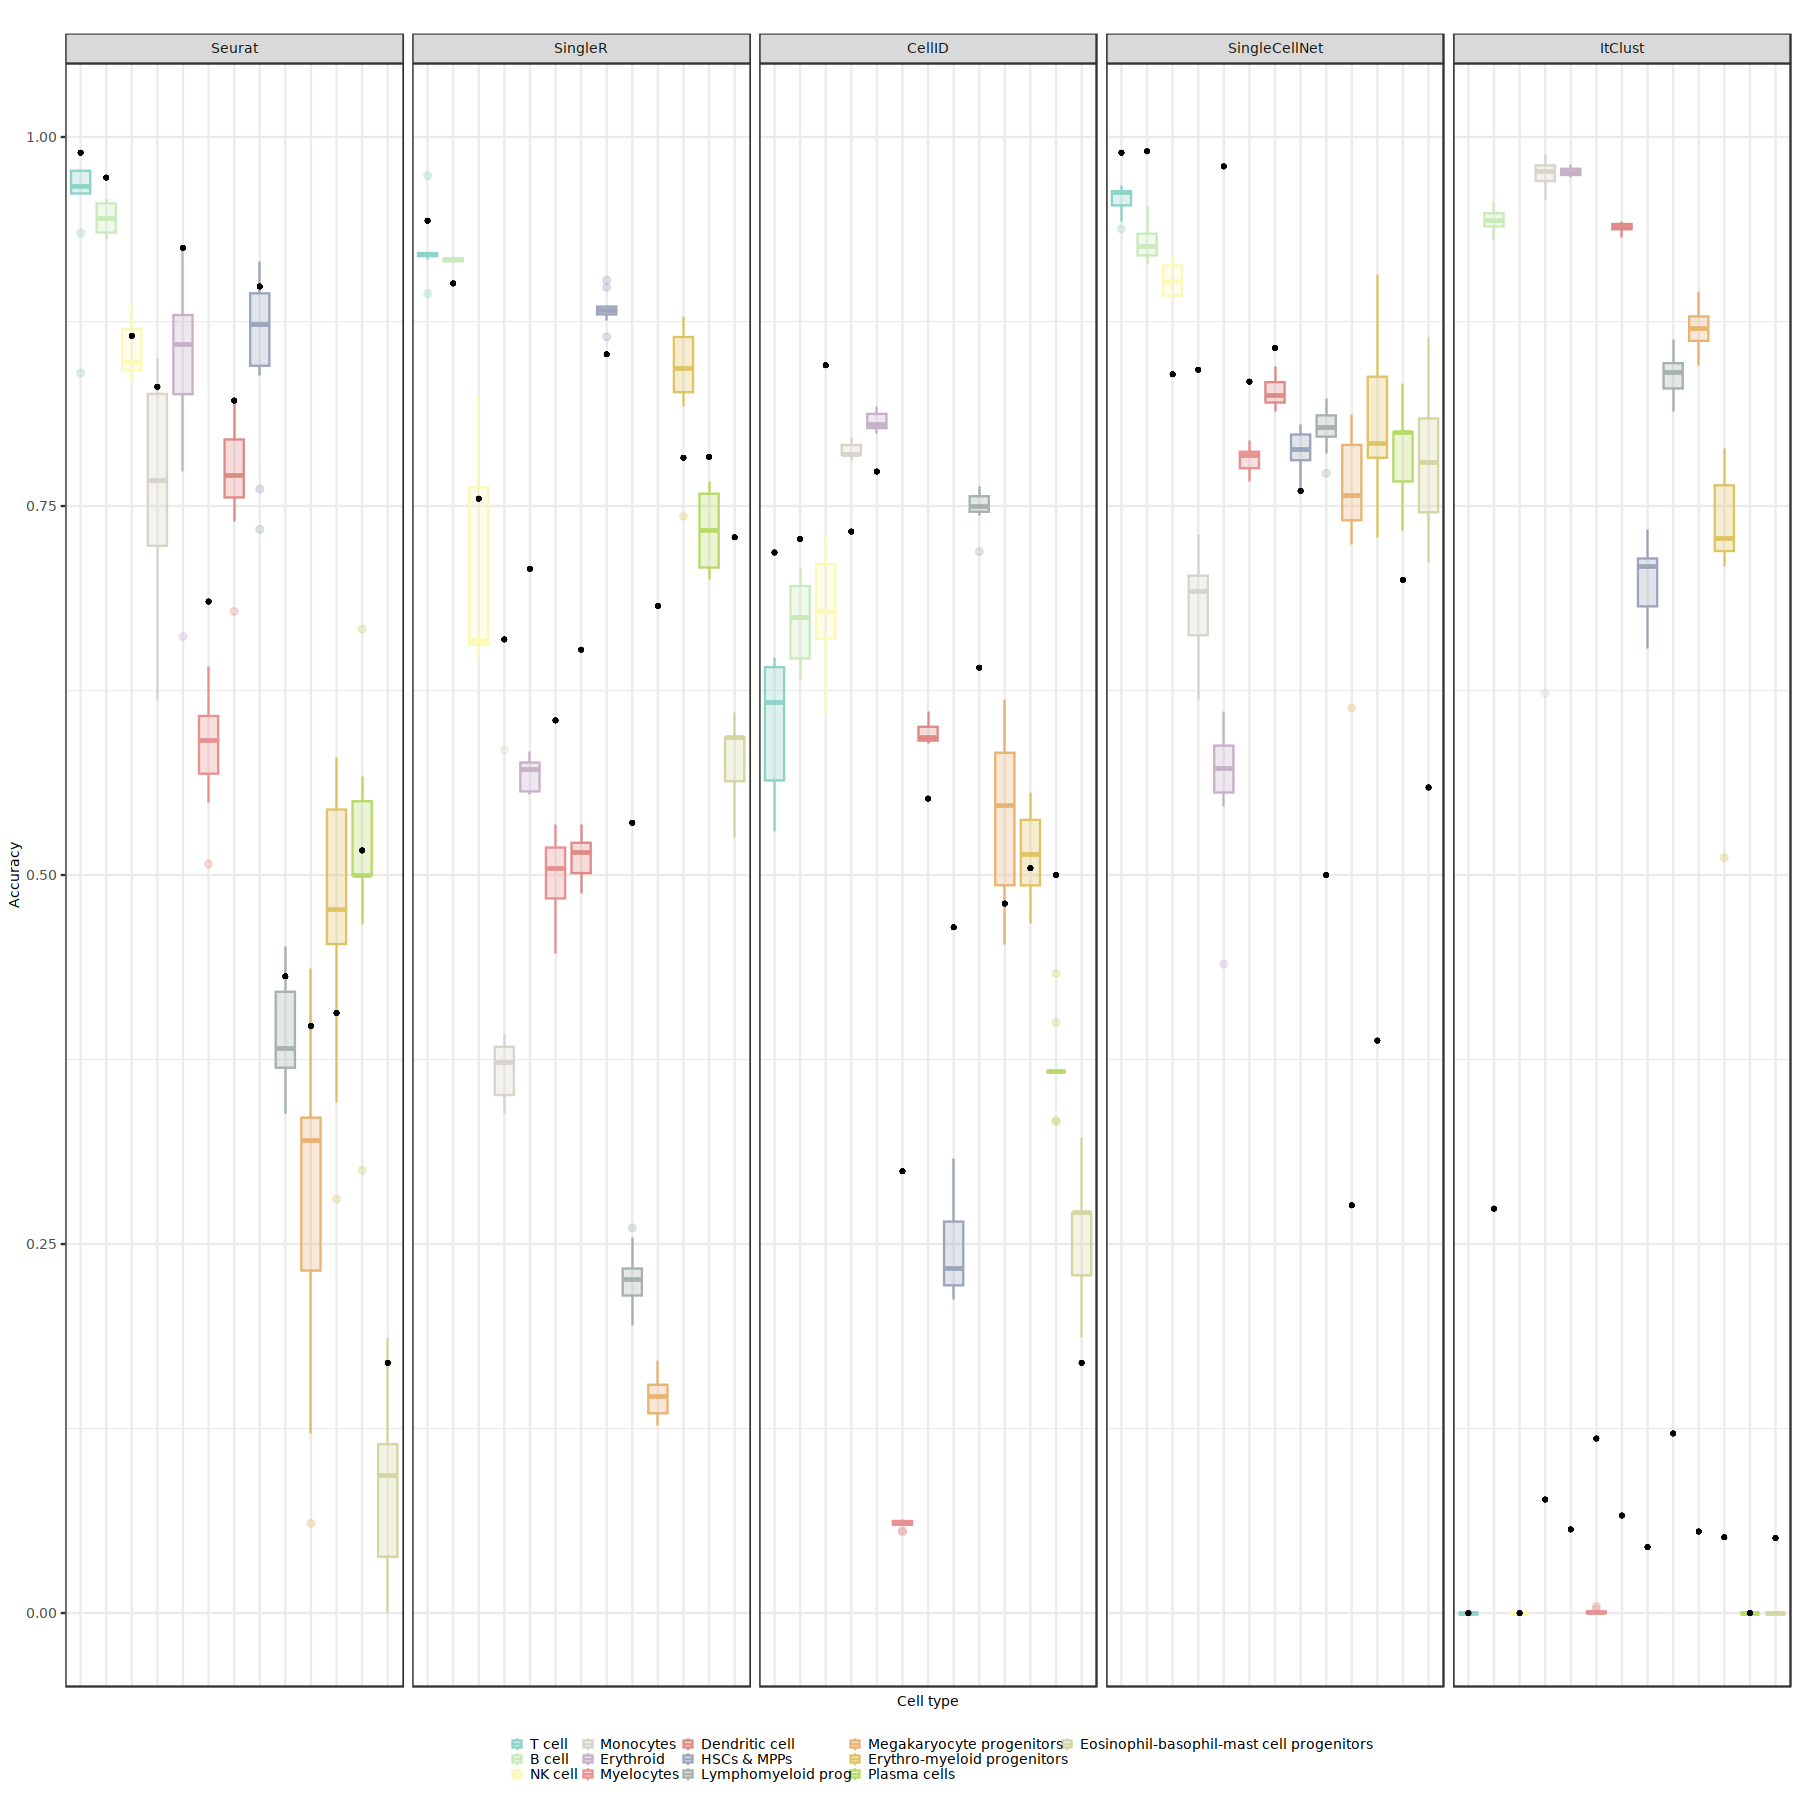

Warning message:
“Removed 46 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_point()`).”


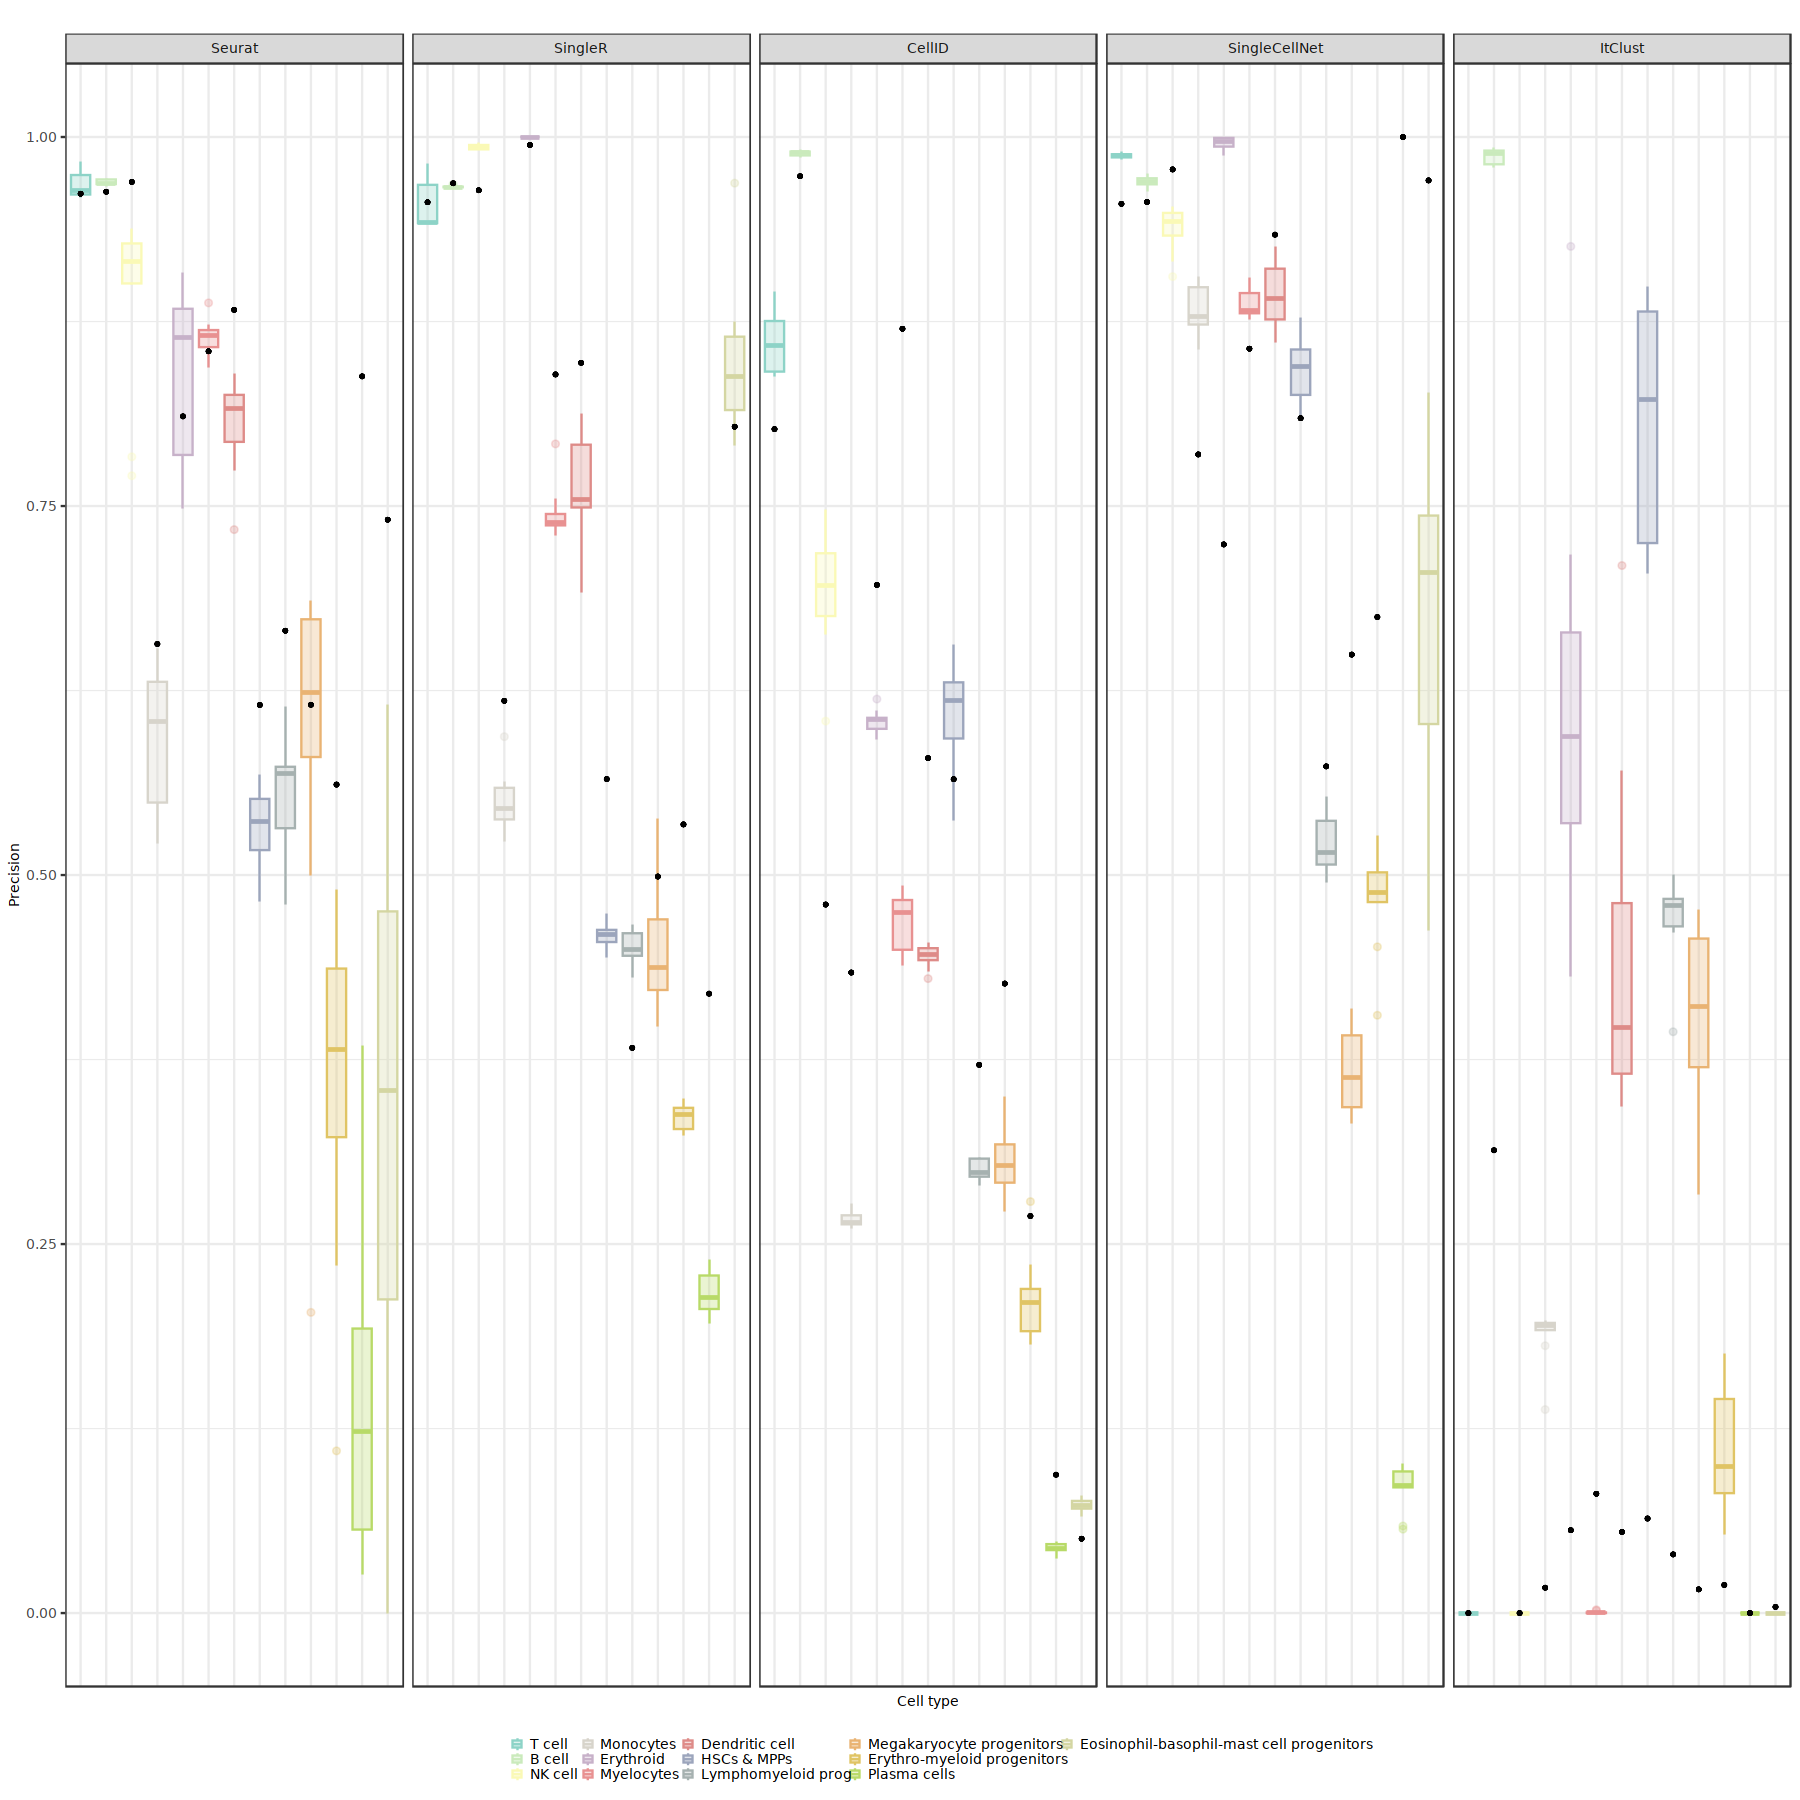

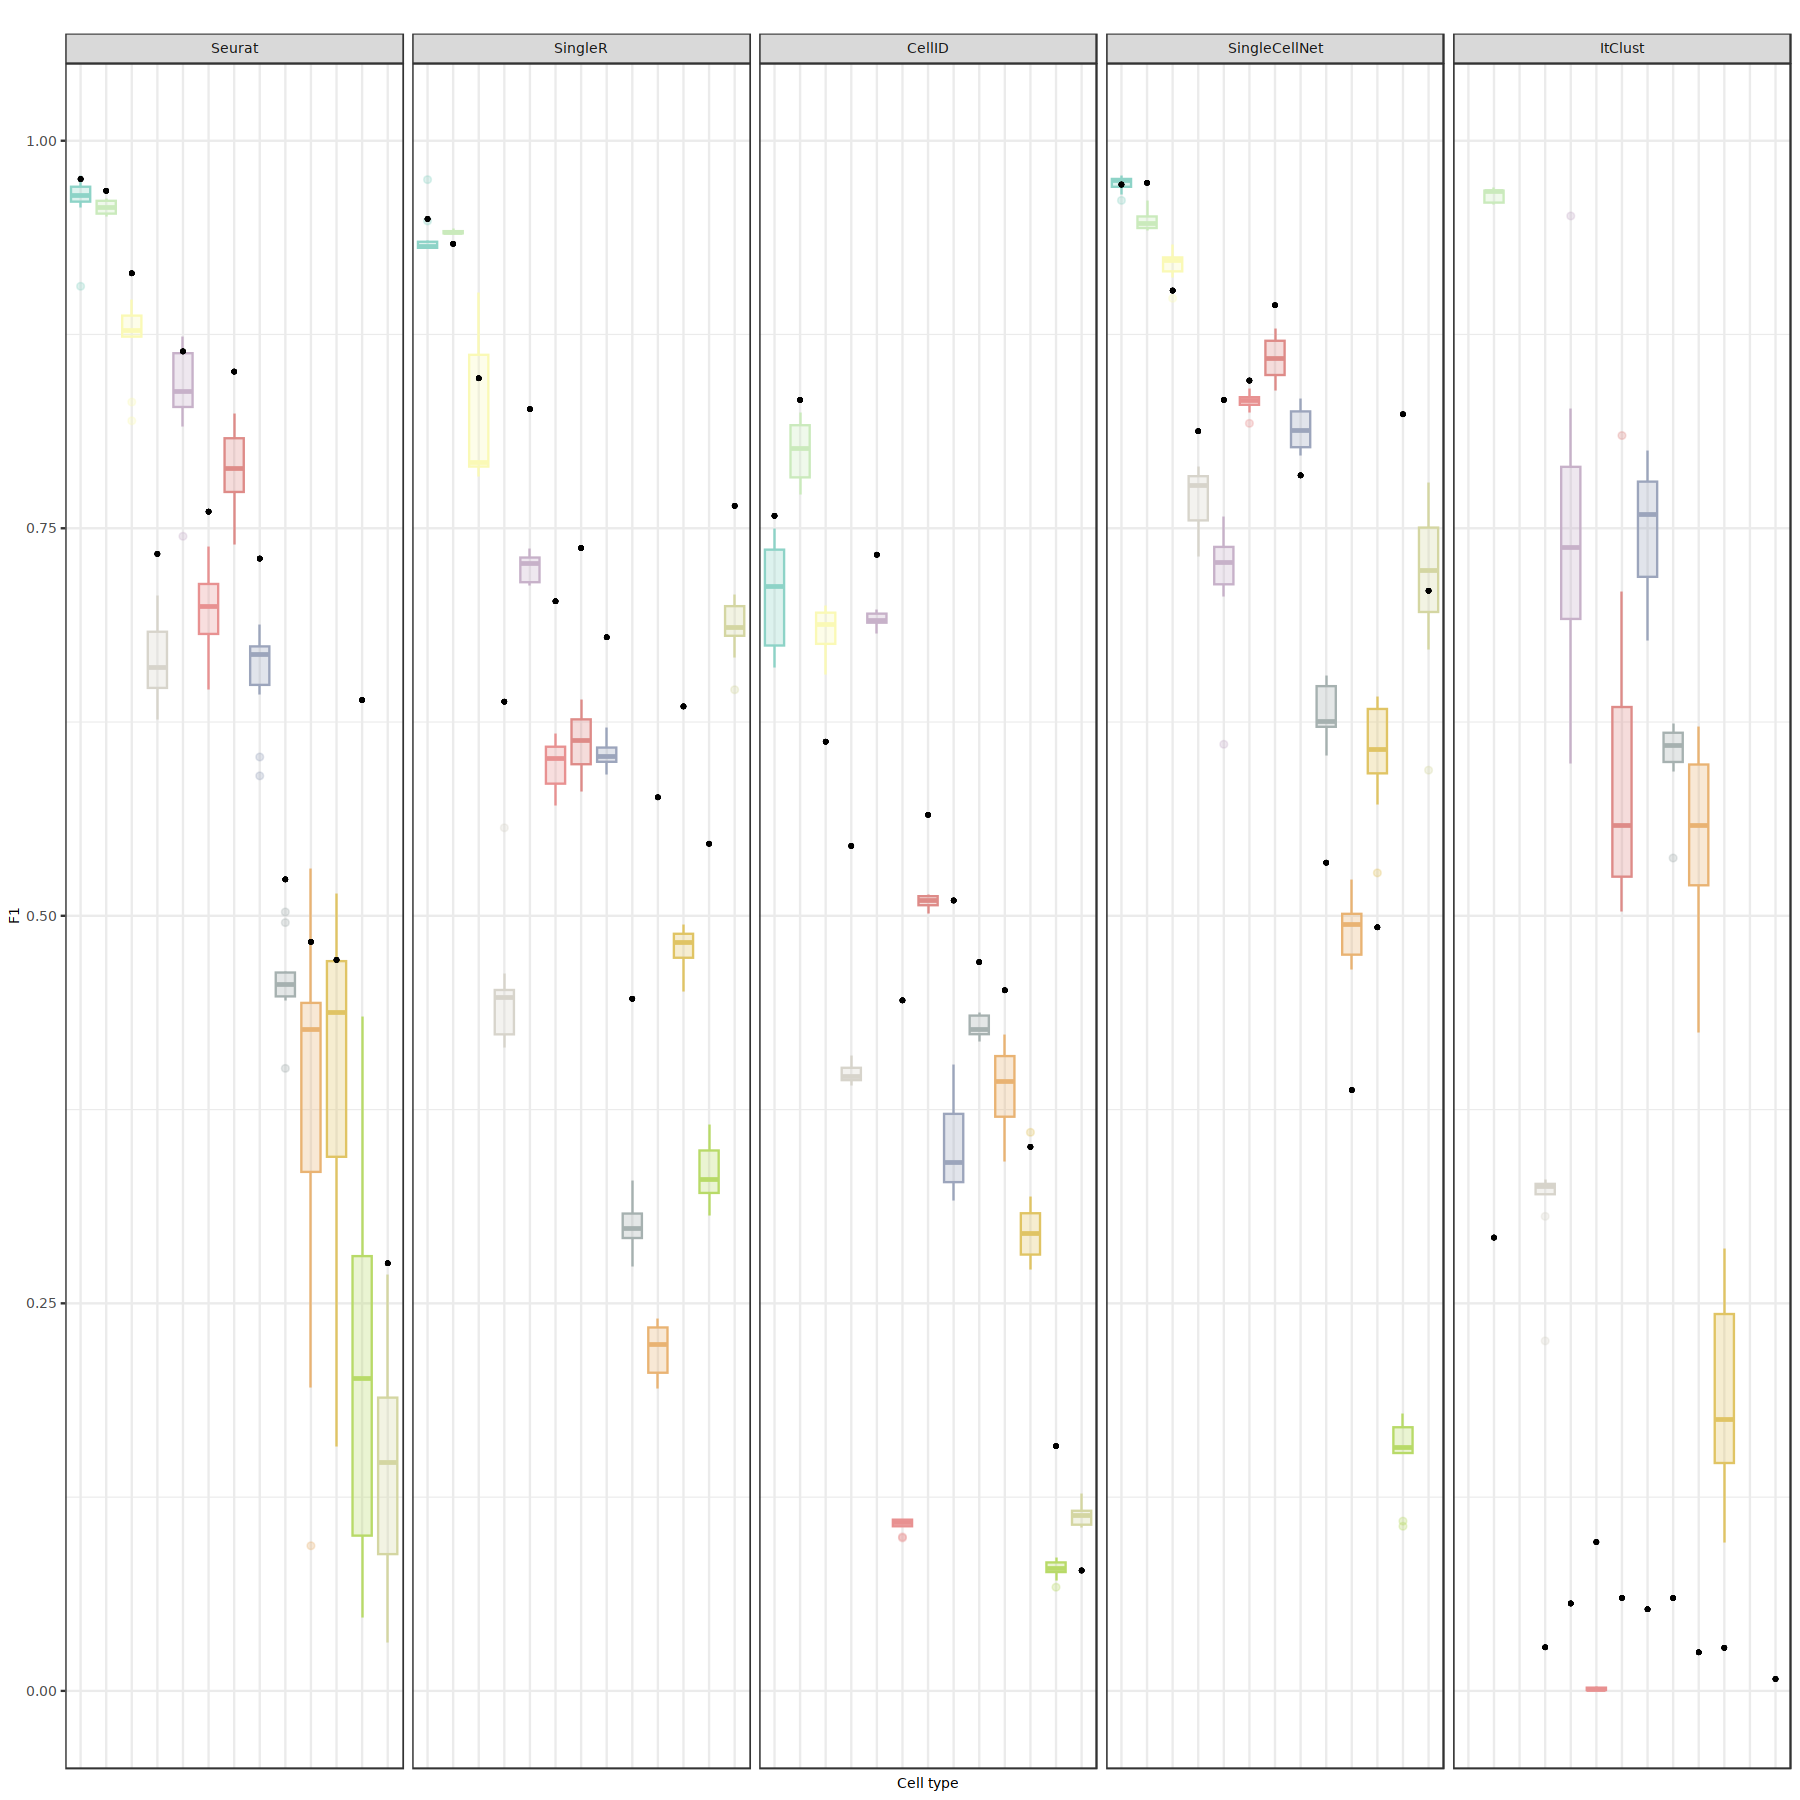

In [26]:
bootstrap_weighted <- read.csv("../Results/Files/summary_BoneMarrow14707.csv")


bootstrap_weighted$precision[is.na(bootstrap_weighted$precision)] <- 0
bootstrap_weighted$full_precision[is.na(bootstrap_weighted$full_precision)] <- 0
nrow(bootstrap_weighted)
bootstrap_weighted <- bootstrap_weighted[!is.na(bootstrap_weighted$accuracy),]

plot_accuracy  <- get_violin_plot(bootstrap_weighted, colors, celltypes, methods,
                                 "", "Accuracy", colors)
plot_precision <- get_violin_plot(bootstrap_weighted, colors, celltypes, methods,
                                  "", "Precision", colors)
plot_f1        <- get_violin_plot(bootstrap_weighted, colors, celltypes, methods,
                                  "", "F1", colors)+theme(legend.position = "none")

plot_accuracy
plot_precision
plot_f1 

Warning message:
“Removed 46 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_point()`).”


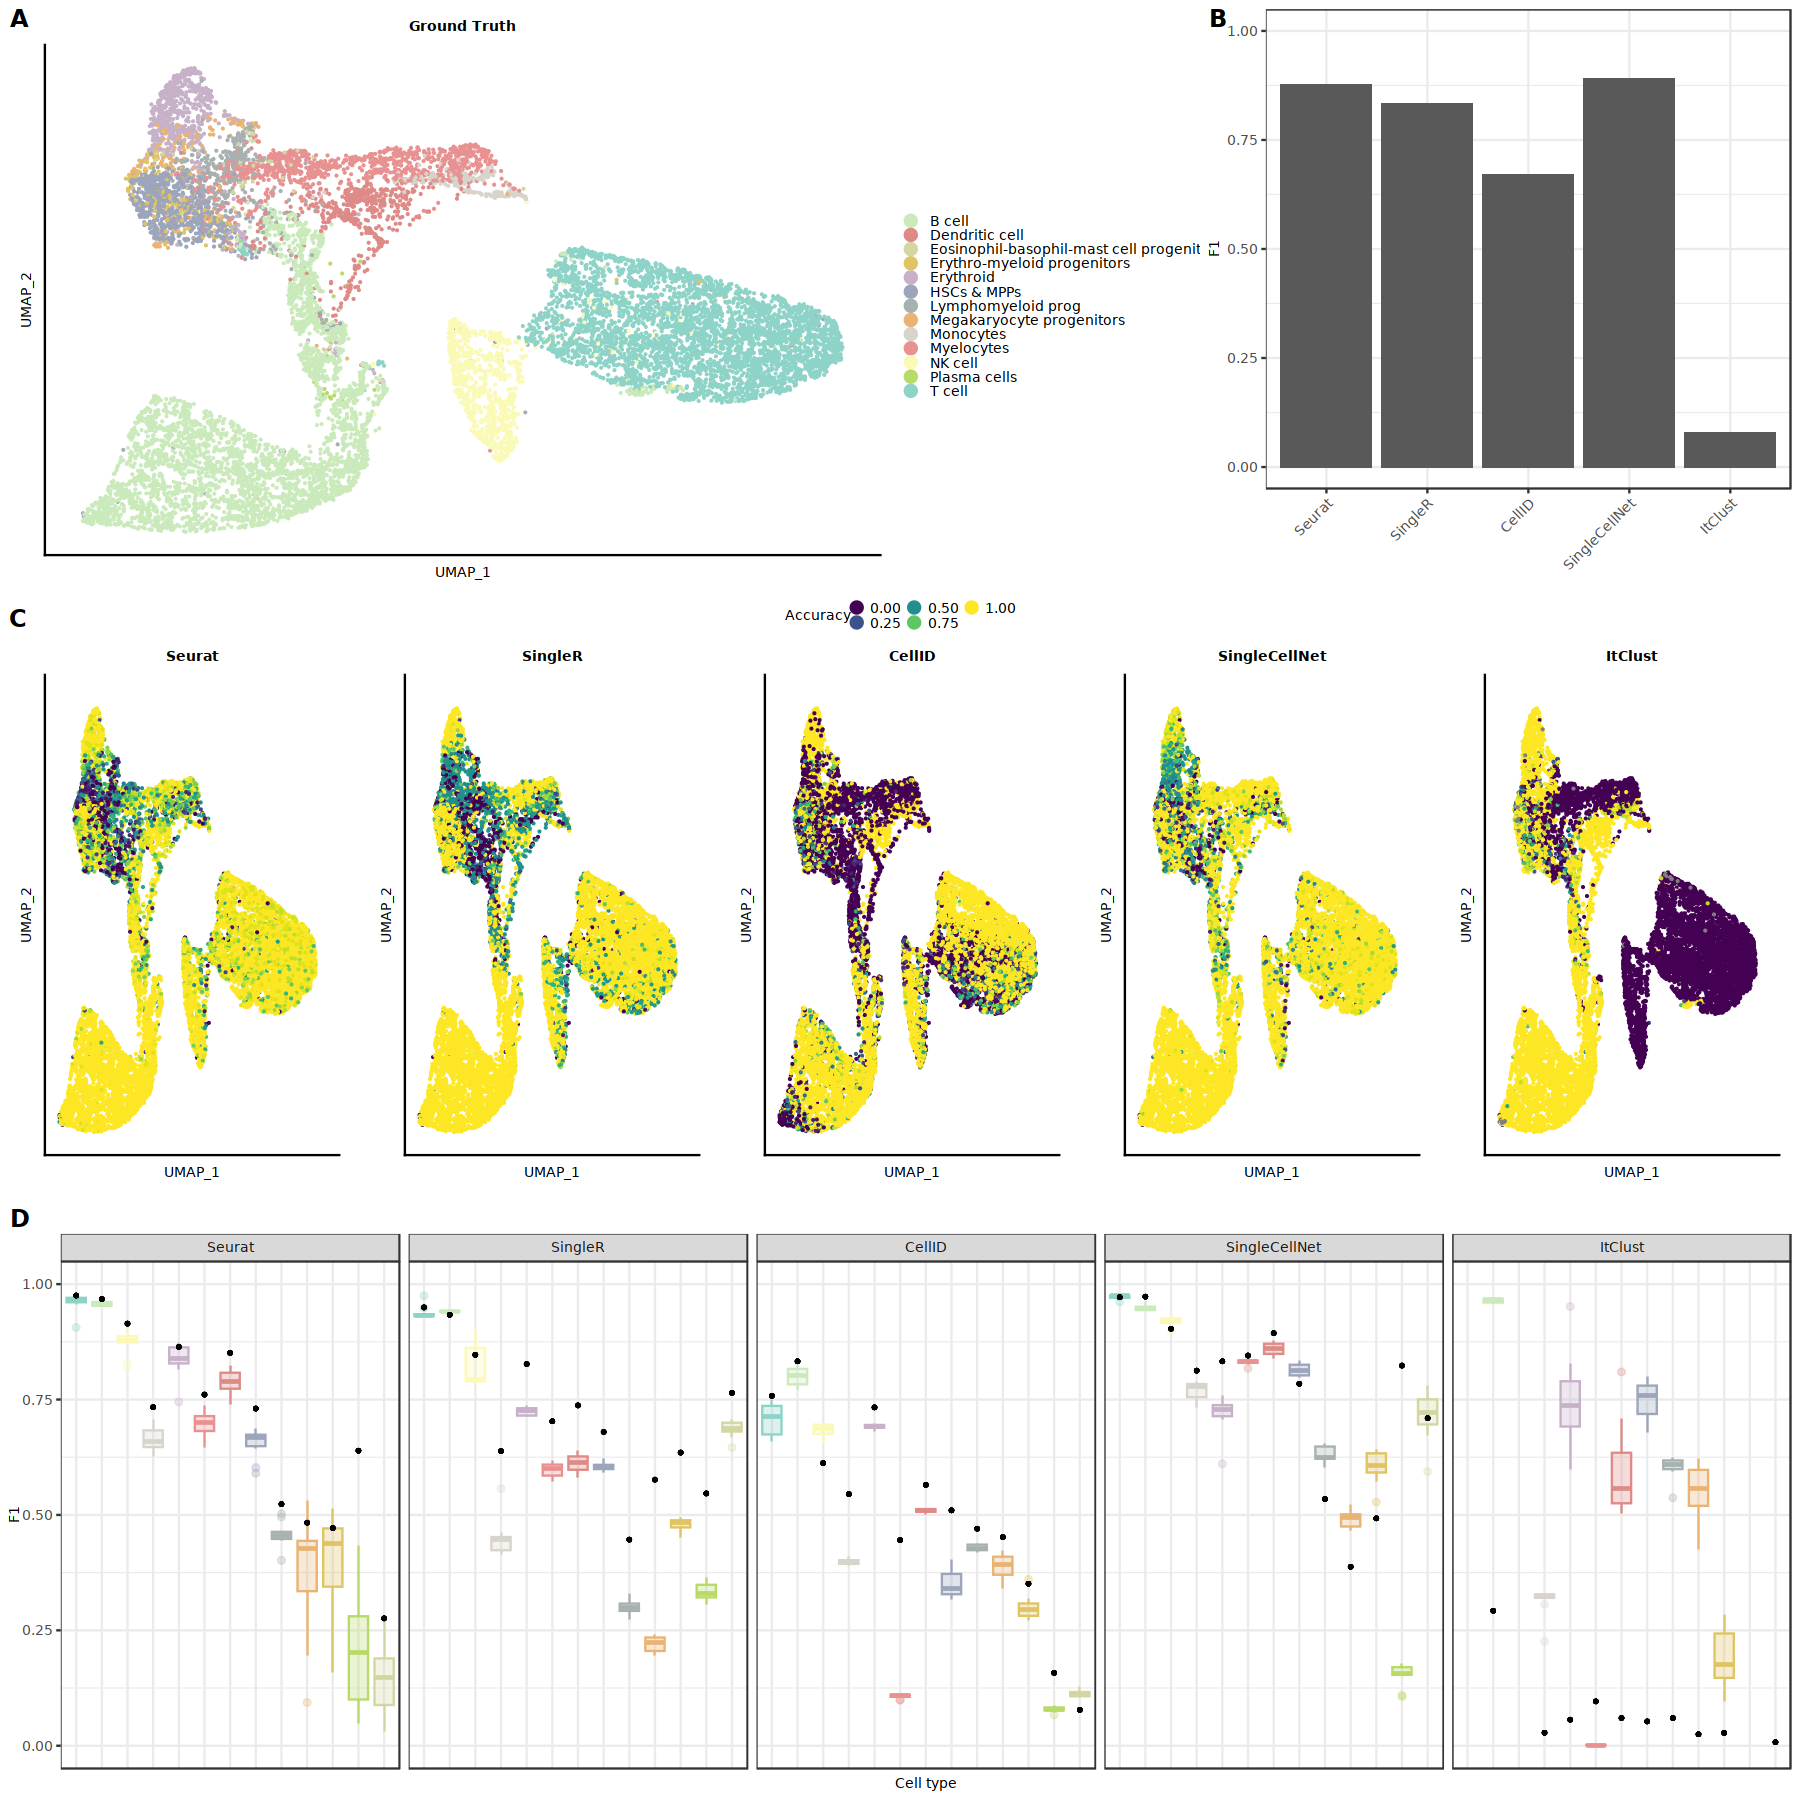

In [30]:
options(repr.plot.width=15, repr.plot.height=15)
f6ab <- ggpubr::ggarrange(f6a, f7b,   nrow=1, ncol=2, labels= c("A", "B"), widths = c(2,1))
f6 <- ggpubr::ggarrange(f6ab, f6b, plot_f1,  nrow=3, ncol=1, labels= c("", "C", "D"))
f6

In [41]:
ggsave(
  "../Results/Figures/F7_bonemarrow.jpg",
  plot = f6,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 160,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)

ggsave(
  "../Results/Figures/S7_bonemarrow.jpg",
  plot = s3,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 200,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)

Warning message:
“Removed 24 rows containing missing values (`geom_hline()`).”
